# **GSoC 2024 QMLHEP Task I**
---

## **Quantum Computing Basics**
This task involve creating two simple quantum circuits using cirq applying basic quantum operations for the first one and perform swap test in the second one.

### **Resources**
* [Cirq Documentation](https://quantumai.google/cirq/start/basics)
* [Xanadu Codebook](https://codebook.xanadu.ai/I.13)

##### Required libraries

In [1]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

<a name = "p1"></a>

---
# **Task 1.1**
---

### **Implement a simple quantum operation with Cirq or Pennylane**

- With 5 qubits 
- Apply Hadamard operation on every qubit 
- Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
- SWAP (0, 4) 
- Rotate $X$ with $\pi/2$ on any qubit 
- Plot the circuit 

In [ ]:
# 1. Create a circuit with 5 qubits
qubits = cirq.NamedQubit.range(5, prefix = 'q')
circuit = cirq.Circuit()

# 2 .Apply a Hadamard gate on each qubit
circuit.append(cirq.H.on_each(qubits))

# 3. Apply CNOT gates on qubits (0, 1), (1, 2), (2, 3), (3, 4)
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[1], qubits[2]))
circuit.append(cirq.CNOT(qubits[2], qubits[3]))
circuit.append(cirq.CNOT(qubits[3], qubits[4]))

# 4. Swaps the qubits 0 and 4
circuit.append(cirq.SWAP(qubits[0], qubits[4]))

# 5. Apply an X rotation of pi/2 radians on the qubit 3
circuit.append(cirq.rx(np.pi/2).on(qubits[3]))


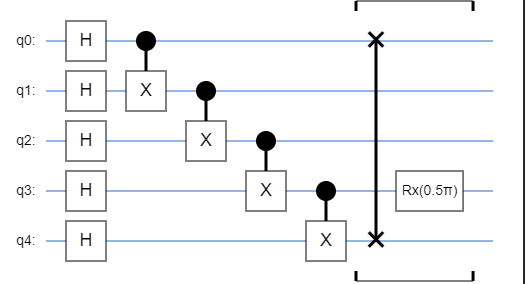


---
# **Task 1.2**
---

### **Implement a second circuit with a framework of your choice:**

- Apply a Hadmard gate to the first qubit
- rotate the second qubit by $\pi/3$ around $X$
- Apply Hadamard gate to the third and fourth qubit
- Perform a swap test between the states of the first and second qubit $\ket{q1} \ket{q2}$ and the third and fourth qubit $\ket{q3} \ket{q4}$


In [ ]:
# Create a circuit with 5 qubits
qubits = cirq.NamedQubit.range(5, prefix = 'q')
circuit = cirq.Circuit()

# 1. Apply a Hadamard gate to the first qubit
circuit.append(cirq.H(qubits[0]))

# 2. Rotate the second qubit by pi/3 around X
circuit.append(cirq.rx(np.pi/3).on(qubits[1]))

# 3. Apply Hadamard gates to the third and fourth qubits
circuit.append(cirq.H.on_each(qubits[2:4]))

#Plot the circuit
SVGCircuit(circuit)

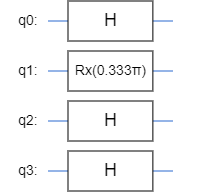

## **Swap tests**


Swap test is a procedure in quantum computation used to check how much two quantum states differ.
Let $\ket{a}$ and $\ket{b}$ be two states and $\ket{0}$ be an auxiliar qubit. The swap test applied to this two states consist in four steps.

#### **Step 1**

The initial state of our three qubit system is :
$$\ket{\psi} = \ket{0\, a\, b}$$
 The first step is to apply a Hadamard gate to the auxiliar qubit, after this, the state of the system is:

 $$\ket{\psi} = \frac{1}{\sqrt{2}}(\ket{0 a b} + \ket{1 a b})$$

 #### **Step 2**

 The second step is to apply a controlled SWAP gate to the three qubit system where the auxiliar qubit is the control. After this the state of the system is:

 $$\ket{\psi} = \frac{1}{\sqrt{2}}(\ket{0 a b} + \ket{1 b a})$$

 #### **Step 3**

 The third step is to apply a second Hadamard gate to the auxiliar qubit, then the state of the system is:


$$
\begin{aligned}
    \ket{\psi} &= \frac{1}{2}(\ket{0 a b} + \ket{1 a b} + \ket{0 b a} - \ket{1 b a})\\
    \ket{\psi} &= \frac{1}{2}(\ket{0 a b} + \ket{0 b a}) + \frac{1}{2}(\ket{1 a b} - \ket{1 b a}) \\
    \ket{\psi} &= \frac{1}{2}\ket{0}(\ket{a b} + \ket{b a}) + \frac{1}{2}\ket{1}((\ket{a b} + \ket{b a}))
\end{aligned}
$$

#### **Step 4**

Finally we perform a measurement on the auxiliar qubit. We know that if the state of the quantum system is $\ket{\psi}$ immediately before the measurement then the probability of observe 0 is given by

$$P(0) = \bra{\psi}{M_{0}^{\dagger} M_{0} \ket{\psi}} $$

Where $M_{0} = \ket{0}\bra{0}$. In our case we have:


$$
\begin{aligned}
P(aux\, qubit = 0) &= \bra{\psi}{M_{0}^{\dagger} M_{0} \ket{\psi}} \\
&=\bra{\psi}\braket{0|0}\ket{0} \bra{0}\ket{\psi} \\
&=\braket{\psi|0} \braket{0|\psi} \\
&= \frac{1}{4}(\bra{a b} + \bra{b a})(\ket{a b} + \ket{b a}) \\
&= \frac{1}{4}(1 + 1 + \braket{ab|ba} + \braket{ba|ab})
&= \frac{1}{4}(2 + 2 \, |\braket{a|b}| ^2)
\end{aligned}
$$

Thus
$$
\begin{aligned}
P(aux\, qubit = 0) &= \frac{1}{2}+\frac{1}{2}\, |\braket{a|b}|^2
\end{aligned}
$$

We will measure 0 when $\ket{a} = \ket{b}$ 

In [47]:
# Create two auxiliar qubits
aux_qubits = cirq.NamedQubit.range(2, prefix = 'aux_q')

# Create the swap test circuits
swap_circuit_q0_q1 = cirq.Circuit()
swap_circuit_q2_q3 = cirq.Circuit()

# Swap test for qubits q0 and q1
swap_circuit_q0_q1.append(cirq.H(aux_qubits[0]))
swap_circuit_q0_q1.append(cirq.CSWAP(aux_qubits[0], qubits[0], qubits[1]))
swap_circuit_q0_q1.append(cirq.H(aux_qubits[0]))

# Swap test for qubits q2 and q3 
swap_circuit_q2_q3.append(cirq.H(aux_qubits[1]))
swap_circuit_q2_q3.append(cirq.CSWAP(aux_qubits[1], qubits[2], qubits[3]))
swap_circuit_q2_q3.append(cirq.H(aux_qubits[1]))

In [ ]:
# Plot the swap test circuit for qubits q0 and q1 
SVGCircuit(swap_circuit_q0_q1)

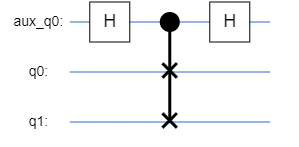

In [ ]:
# Plot the swap test circuit for qubits q2 and q3
SVGCircuit(swap_circuit_q2_q3)

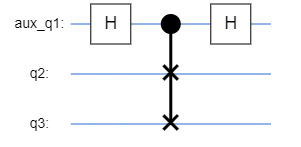

In [ ]:
# Combine the circuits
final_circuit = circuit + swap_circuit_q0_q1 + swap_circuit_q2_q3

# Measure the auxiliar qubits
final_circuit.append(cirq.measure(aux_qubits[0], aux_qubits[1]))

# Plot the circuit
SVGCircuit(final_circuit)

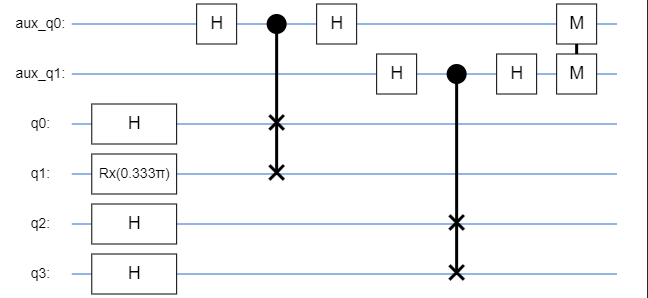

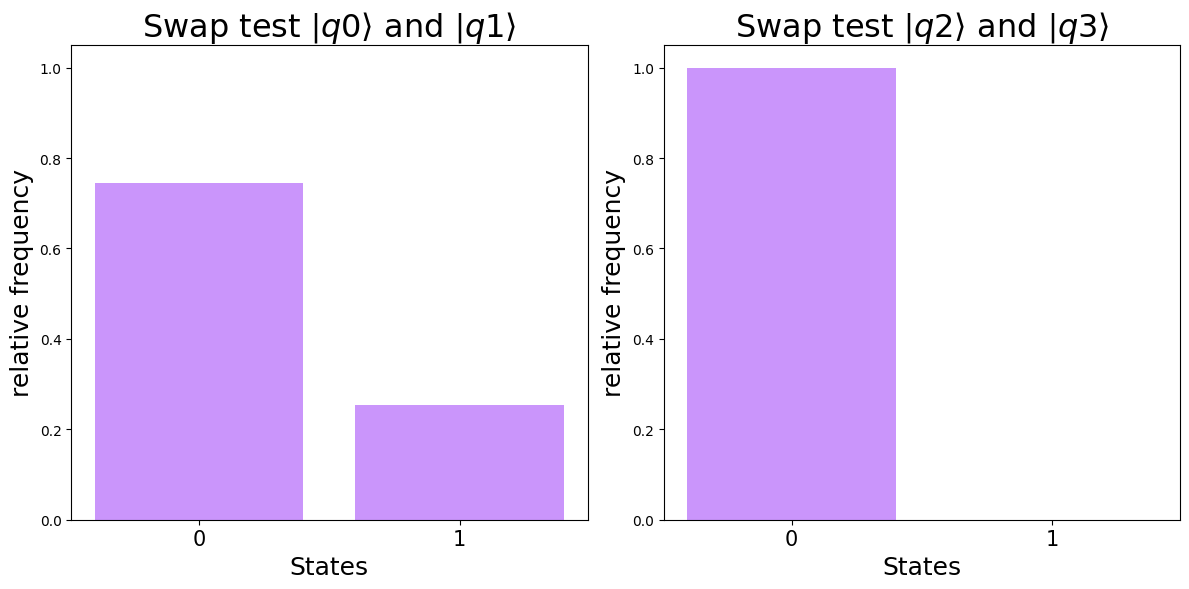

In [65]:
# Simulate the circuit
sim = cirq.Simulator()
result = sim.run(final_circuit, repetitions = 5000)

# Extract the measurements 
aux_q0_measurements = result.measurements['aux_q0,aux_q1'].T[0]
aux_q1_measurements = result.measurements['aux_q0,aux_q1'].T[1]

# Plot the results
plt.figure(figsize=(12, 6))

# Histogram for aux q0
plt.subplot(1, 2, 1)
plt.hist(aux_q0_measurements, bins=2, range=(0, 2), rwidth=0.8, color='#CA95FB', align='left', density=True)
plt.xlabel('States', fontsize = 18)
plt.ylabel('relative frequency',fontsize = 18)
plt.title(r'Swap test $\left|q0\right\rangle$ and $\left|q1\right\rangle$', fontsize = 23)
plt.xticks([0, 1], fontsize = 15)
plt.ylim((0, 1.05))

# Histogram for aux q1
plt.subplot(1, 2, 2)
plt.hist(aux_q1_measurements, bins=2, range=(0, 2), rwidth=0.8, color='#CA95FB', align='left', density=True)
plt.xlabel('States', fontsize = 18)
plt.ylabel('relative frequency', fontsize = 18)
plt.title(r'Swap test $\left|q2\right\rangle$ and $\left|q3\right\rangle$', fontsize = 23)
plt.xticks([0, 1], fontsize = 15)

plt.tight_layout()
plt.show()

This results match with the predicted by equation $P(aux\, qubit = 0) = \frac{1}{2}+\frac{1}{2}\, |\braket{a|b}|^2$, as the states $\ket{q2}$ and $\ket{q3}$ are the same (both qubits are in $\ket{+}$) it is expected to measure a $\ket{0}$ with probability of $100\%$ exactly what our simulation outcomes shows. For the qubits 0 and 1 the situation is different, whereas qubit 0 is in the state $\ket{+}$, the qubit 1 has undergo a x rotation of $\pi / 3$, thus its state will be:

$$
\ket{q1} = 
\left[
  \begin{array}{cc}
    \cos{\frac{\pi}{6}} & -i \sin{\frac{\pi}{6}} \\
    -i \sin{\frac{\pi}{6}} & \cos{\frac{\pi}{6}} \\

  \end{array}
\right]
\begin{bmatrix}
           1 \\
           0 \\
         \end{bmatrix}
$$

$$
\ket{q1} = \cos{\frac{\pi}{6}} \ket{0} -i \sin{\frac{\pi}{6}} \ket{1}
$$

By using the equation **(1)**, we can calculate the probability of measure the auxiliar qubit in the state $\ket{0}$

$$
\begin{aligned}
P(aux\, qubit = 0) &= \frac{1}{2}+\frac{1}{2}\, |\braket{+|q1}|^2 \\
&= \frac{1}{2}+\frac{1}{2}\, |\braket{+|q1}|^2 \\
&= \frac{1}{2}+\frac{1}{2}\, \left|\cos{\frac{\pi}{6}}\braket{+|0} - \sin{\frac{\pi}{6}}\braket{+|1} \right|^2 \\ 
&= \frac{1}{2}+\frac{1}{2}\, \left|\frac{\cos{\pi/6}}{\sqrt{2}}\braket{0|0} + \frac{\cos{\pi/6}}{\sqrt{2}}\braket{1|0} - \frac{\sin{\pi/6}}{\sqrt{2}}\braket{0|1} - \frac{\sin{\pi/6}}{\sqrt{2}}\braket{1|1} \right|^2 \\ 
&= \frac{1}{2}+\frac{1}{2}\, \left| \frac{\cos{\pi/6} -i \sin{\pi/6}}{\sqrt{2}} \right|^2
\end{aligned}
$$

Thus

$$
P(aux\, qubit = 0) = \frac{1}{2}+\frac{1}{2}\, \left(\frac{1}{2}\right) = 0.75
$$

Which it is more or less the relative frequency of measuring the auxiliar qubit in $\ket{0}$ state given by our simulation.